In [4]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

Text(0,0.5,'Profit in $10,000s')

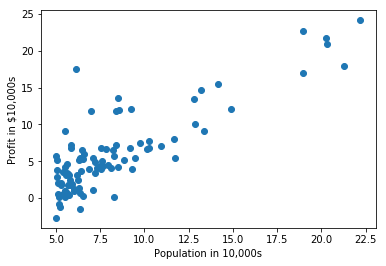

In [5]:
tt = pd.read_csv(r"C:\Users\Yow-Gwo Wang\Desktop\ML\machine-learning-ex1\machine-learning-ex1\ex1\ex1data1.txt", header=None)
plt.scatter(tt[0].tolist(), tt[1].tolist())
m = len(tt[0].tolist())
plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in $10,000s')


In [6]:
theta = np.zeros((2,1))
X = np.array([np.ones(m).tolist(), tt[0].tolist()])
y = np.array([tt[1].tolist()])
num_iters = 1500
alpha = 0.01

In [7]:
def computeCost(X, y, theta):
    J = 0
    m = y.size
    a = 1/(2*m)
    b = np.square(np.dot(theta.transpose(), X) - y)
    J = a*b.sum()
    return J 

In [8]:
computeCost(X, y, theta)

32.072733877455676

In [9]:
computeCost(X, y, np.array([-1, 2]))

54.24245508201238

In [10]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.size
    J_history = [0]*num_iters
    for iter in range(num_iters):
        tmp = (np.dot(theta.transpose(), X) - y)
        theta[0] = theta[0] - alpha/m*tmp.sum()
        theta[1] = theta[1] - alpha/m*(np.multiply(tmp, X)).sum()
        J_history[iter] = computeCost(X, y, theta) 
    
    return theta, J_history

In [11]:
theta, history = gradientDescent(X, y, theta, alpha, num_iters)

In [16]:
input1= np.array([1,3.5])
input2= np.array([1,7])

predict1 = np.dot(input1, theta)
predict2 = np.dot(input2, theta)

In [17]:
print(predict1)
print(predict2)

[0.49695379]
[4.55118059]


In [19]:
line = np.dot(X.transpose(), theta)


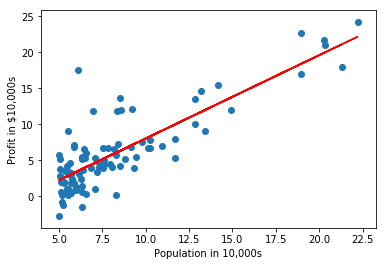

In [20]:
plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X[1], line, 'r-')
plt.scatter(tt[0].tolist(), tt[1].tolist())



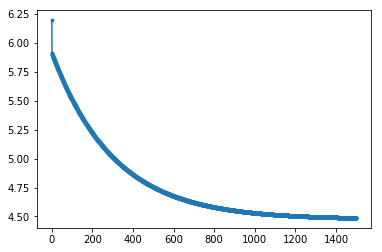

In [21]:
plt.plot(history, '.-')

In [22]:
theta0_vals = np.linspace(-10, 10, 100);
theta1_vals = np.linspace(-1, 4, 100);
J_vals = np.zeros((100, 100))


In [23]:
for i in range(100):
    for j in range(100):
        t = np.matrix([[theta0_vals[i]], [theta1_vals[j]]])
        J_vals[i, j] = computeCost(X, y, t)

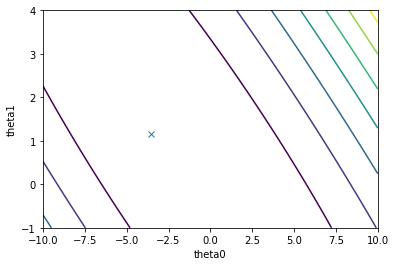

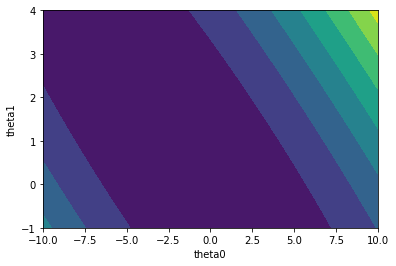

In [24]:
plt.contour(theta0_vals, theta1_vals, J_vals)
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.plot(theta[0], theta[1],'x')
plt.show()

plt.contourf(theta0_vals, theta1_vals, J_vals)
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.show()


In [25]:
def featureNormalize(X):
    col = X.shape[1]
    X_norm = X
    mu = np.zeros((col, 1))
    sigma = np.zeros((col, 1))
    
    for idx, j in enumerate(X.columns):
        mu[idx] = X[j].mean()
        sigma[idx] = X[j].std()
        X_norm[j] = (X[j] - X[j].mean())/X[j].std()

    return X_norm, mu, sigma

In [26]:
def computeCost_Multi(X, y, theta):
    J = 0
    m = y.size
    a = 1/(2*m)
    b = np.square(np.dot(theta.transpose(), X) - y)
    J = a*b.sum()
    return J 

In [27]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.size
    J_history = [0]*num_iters    
    for iter in range(num_iters):
        tmp = (np.dot(theta.transpose(), X) - y)
        for i in range(theta.shape[0]):
            theta[i] = theta[i] - alpha/m*(np.multiply(tmp, X[i])).sum()
        #print(computeCost(X, y, theta))
        J_history[iter] = computeCost_Multi(X, y, theta) 
    
    return theta, J_history

In [28]:
tt = pd.read_csv(r"C:\Users\Yow-Gwo Wang\Desktop\ML\machine-learning-ex1\machine-learning-ex1\ex1\ex1data2.txt", header=None)
tt.columns = ['sqft', 'rooms', 'price']

alpha = 0.01;
num_iters = 400;
theta = np.zeros([3, 1])
X = tt.iloc[:, 0:2]
y = tt.iloc[:, 2:]
y = np.asarray(y['price'].tolist())
X, mu, sigma = featureNormalize(X);
m = len(X.iloc[:,0].tolist())
X = np.array((np.ones(m).tolist(),X['sqft'].tolist(), X['rooms'].tolist()))



C:\Users\Yow-Gwo Wang\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [30]:
theta, history = gradientDescentMulti(X, y, theta, alpha, num_iters)

In [31]:
computeCost(X, y, theta)


2108850058.4007058

In [32]:
theta1, history1 = gradientDescentMulti(X, y, theta, 0.001, num_iters)
theta2, history2 = gradientDescentMulti(X, y, theta, 0.003, num_iters)
theta3, history3 = gradientDescentMulti(X, y, theta, 0.01, num_iters)
theta4, history4 = gradientDescentMulti(X, y, theta, 0.03, num_iters)

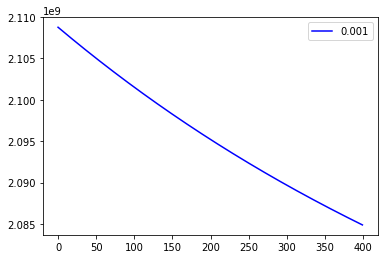

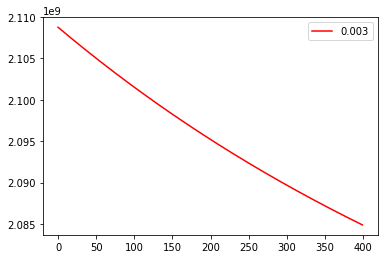

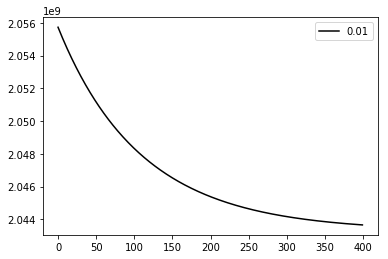

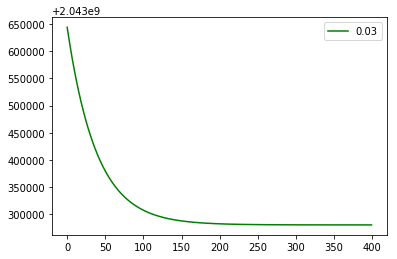

In [33]:
plt.plot(history1, 'b', label='0.001')
plt.legend()
plt.show()
plt.plot(history1, 'r', label='0.003')
plt.legend()
plt.show()
plt.plot(history3, 'k', label='0.01')
plt.legend()
plt.show()
plt.plot(history4, 'g', label='0.03')
plt.legend()
plt.show()



In [34]:
input1= np.array([1, (1650-mu[0])/sigma[0], (3-mu[1])/sigma[1]])
predict1 = np.dot(input1, theta)
predict1

array([293082.5806143])

In [35]:
tt = pd.read_csv(r"C:\Users\Yow-Gwo Wang\Desktop\ML\machine-learning-ex1\machine-learning-ex1\ex1\ex1data2.txt", header=None)
tt.columns = ['sqft', 'rooms', 'price']

alpha = 0.01;
num_iters = 400;
theta = np.zeros([3, 1])
X = tt.iloc[:, 0:2]
X = np.column_stack((np.ones(m).tolist(),X['sqft'].tolist(), X['rooms'].tolist()))
y = tt.iloc[:, 2:]
y = np.column_stack([y['price'].tolist()])
#y = y.reshape(47,1)

In [36]:
#Normal equation
step1 = np.linalg.inv(np.dot(X.transpose(), X))
step2 = np.dot(step1, X.transpose())
theta = np.dot(step2, y)
theta

array([[89597.9095428 ],
       [  139.21067402],
       [-8738.01911233]])

In [37]:
input_norm= np.array([1, 1650, 3])
predict_norm = np.dot(input_norm, theta)
predict_norm

array([293081.46433489])